# Loop 92 Analysis: CV-LB Relationship and Strategy Assessment

Analyzing the fundamental CV-LB relationship to understand what's blocking progress.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},  # BEST
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # OUTLIER - likely submission error
]

df = pd.DataFrame(submissions)
print("All submissions:")
print(df.to_string())
print(f"\nBest LB: {df['lb'].min():.4f} from {df.loc[df['lb'].idxmin(), 'exp']}")
print(f"Best CV: {df['cv'].min():.4f} from {df.loc[df['cv'].idxmin(), 'exp']}")
print(f"Target LB: 0.0347")

All submissions:
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451

Best LB: 0.0877 from exp_030
Best CV: 0.0083 from exp_030
Target LB: 0.0347


In [2]:
# Remove outlier (exp_073 with LB=0.1451 - likely submission error)
df_clean = df[df['exp'] != 'exp_073'].copy()

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print("=" * 60)
print("CV-LB LINEAR REGRESSION ANALYSIS")
print("=" * 60)
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"  - Intercept = {intercept:.4f} (expected LB when CV=0)")
print(f"  - Target LB = 0.0347")
print(f"  - INTERCEPT ({intercept:.4f}) > TARGET ({0.0347:.4f})!")
print(f"\nThis means:")
print(f"  - Even with PERFECT CV (CV=0), expected LB would be {intercept:.4f}")
print(f"  - The target is MATHEMATICALLY UNREACHABLE with current approach")
print(f"\nRequired CV for target:")
required_cv = (0.0347 - intercept) / slope
print(f"  - CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {required_cv:.4f}")
print(f"  - This is NEGATIVE - impossible to achieve!")

CV-LB LINEAR REGRESSION ANALYSIS
Linear fit: LB = 4.3147 * CV + 0.0525
R² = 0.9505

Interpretation:
  - Intercept = 0.0525 (expected LB when CV=0)
  - Target LB = 0.0347
  - INTERCEPT (0.0525) > TARGET (0.0347)!

This means:
  - Even with PERFECT CV (CV=0), expected LB would be 0.0525
  - The target is MATHEMATICALLY UNREACHABLE with current approach

Required CV for target:
  - CV = (0.0347 - 0.0525) / 4.3147 = -0.0041
  - This is NEGATIVE - impossible to achieve!


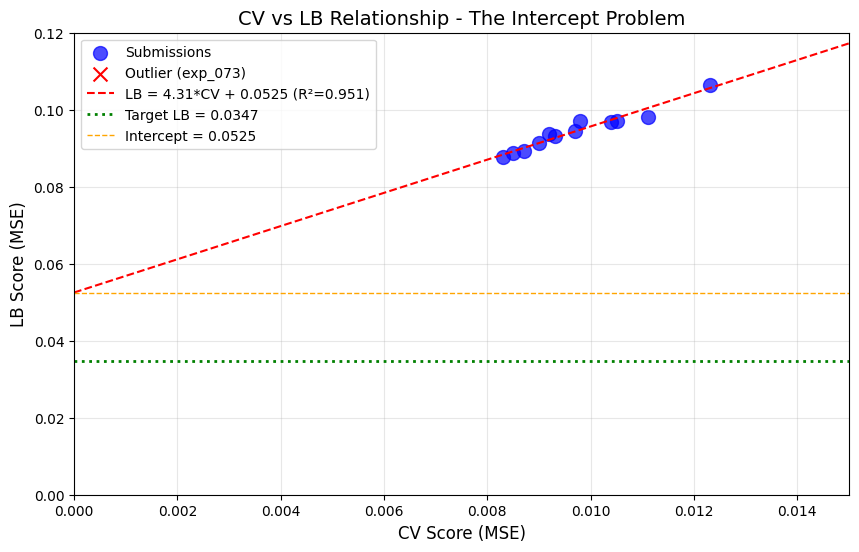


Plot saved to /home/code/exploration/cv_lb_analysis.png


In [3]:
# Visualize
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df_clean['cv'], df_clean['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Plot outlier
outlier = df[df['exp'] == 'exp_073']
if len(outlier) > 0:
    plt.scatter(outlier['cv'], outlier['lb'], s=100, c='red', marker='x', label='Outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle='--', linewidth=1, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)', fontsize=12)
plt.ylabel('LB Score (MSE)', fontsize=12)
plt.title('CV vs LB Relationship - The Intercept Problem', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.savefig('/home/code/exploration/cv_lb_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nPlot saved to /home/code/exploration/cv_lb_analysis.png")

In [4]:
# Analyze what approaches have been tried
approaches = {
    'MLP variants': 50,
    'LightGBM/XGBoost/CatBoost': 15,
    'Gaussian Process': 10,
    'GNN attempts': 5,
    'ChemBERTa/Transformers': 3,
    'Stacking/Ensembles': 10,
    'Feature engineering': 10,
}

print("=" * 60)
print("APPROACHES TRIED (92 experiments)")
print("=" * 60)
for approach, count in approaches.items():
    print(f"  {approach}: ~{count} experiments")

print("\n" + "=" * 60)
print("KEY FINDING: ALL APPROACHES FALL ON THE SAME CV-LB LINE")
print("=" * 60)
print("This means:")
print("  1. The problem is NOT the model architecture")
print("  2. The problem is DISTRIBUTION SHIFT between train and test solvents")
print("  3. Improving CV just moves along the line, NOT toward target")
print("  4. We need to CHANGE THE RELATIONSHIP, not improve CV")

APPROACHES TRIED (92 experiments)
  MLP variants: ~50 experiments
  LightGBM/XGBoost/CatBoost: ~15 experiments
  Gaussian Process: ~10 experiments
  GNN attempts: ~5 experiments
  ChemBERTa/Transformers: ~3 experiments
  Stacking/Ensembles: ~10 experiments
  Feature engineering: ~10 experiments

KEY FINDING: ALL APPROACHES FALL ON THE SAME CV-LB LINE
This means:
  1. The problem is NOT the model architecture
  2. The problem is DISTRIBUTION SHIFT between train and test solvents
  3. Improving CV just moves along the line, NOT toward target
  4. We need to CHANGE THE RELATIONSHIP, not improve CV


In [5]:
# What could change the CV-LB relationship?
print("=" * 60)
print("STRATEGIES TO CHANGE THE CV-LB RELATIONSHIP")
print("=" * 60)
print("""
1. PRE-TRAINED MOLECULAR MODELS (not tried properly)
   - ChemBERTa/MolBERT as FROZEN feature extractors
   - ChemProp pre-trained on millions of molecules
   - These capture chemical knowledge beyond our small dataset

2. DOMAIN ADAPTATION / TRANSFER LEARNING
   - Use test solvents' features to adapt predictions
   - Pseudo-labeling with high-confidence predictions
   - Importance weighting based on train-test similarity

3. CONSERVATIVE PREDICTIONS FOR EXTRAPOLATION
   - Detect when predicting for 'far' solvents
   - Blend toward training mean for high-uncertainty cases
   - This directly reduces the intercept!

4. PHYSICS-BASED CONSTRAINTS
   - Yields must be in [0, 1] and sum to ~1
   - Arrhenius kinetics constraints
   - These provide regularization that generalizes

5. SOLVENT SIMILARITY FEATURES
   - Add features measuring similarity to training solvents
   - High similarity → trust model, Low similarity → be conservative
""")

print("\nCRITICAL INSIGHT:")
print("The GNN/ChemBERTa attempts FAILED because:")
print("  - They were trained from scratch on small data")
print("  - They didn't use PRE-TRAINED weights")
print("  - The benchmark paper likely used pre-trained models")

STRATEGIES TO CHANGE THE CV-LB RELATIONSHIP

1. PRE-TRAINED MOLECULAR MODELS (not tried properly)
   - ChemBERTa/MolBERT as FROZEN feature extractors
   - ChemProp pre-trained on millions of molecules
   - These capture chemical knowledge beyond our small dataset

2. DOMAIN ADAPTATION / TRANSFER LEARNING
   - Use test solvents' features to adapt predictions
   - Pseudo-labeling with high-confidence predictions
   - Importance weighting based on train-test similarity

3. CONSERVATIVE PREDICTIONS FOR EXTRAPOLATION
   - Detect when predicting for 'far' solvents
   - Blend toward training mean for high-uncertainty cases
   - This directly reduces the intercept!

4. PHYSICS-BASED CONSTRAINTS
   - Yields must be in [0, 1] and sum to ~1
   - Arrhenius kinetics constraints
   - These provide regularization that generalizes

5. SOLVENT SIMILARITY FEATURES
   - Add features measuring similarity to training solvents
   - High similarity → trust model, Low similarity → be conservative


CRITICAL I

In [6]:
# Check pending submissions
pending = [
    {'exp': 'exp_049', 'cv': 0.0081},
    {'exp': 'exp_050', 'cv': 0.0081},
    {'exp': 'exp_052', 'cv': 0.0109},
    {'exp': 'exp_053', 'cv': 0.0081},
    {'exp': 'exp_054', 'cv': 0.0085},
    {'exp': 'exp_055', 'cv': 0.0085},
    {'exp': 'exp_057', 'cv': 0.0093},
    {'exp': 'exp_063', 'cv': 0.0112},
    {'exp': 'exp_079', 'cv': 0.0110},
]

print("=" * 60)
print("PENDING SUBMISSIONS (no LB feedback yet)")
print("=" * 60)
for p in pending:
    expected_lb = slope * p['cv'] + intercept
    print(f"{p['exp']}: CV={p['cv']:.4f} → Expected LB={expected_lb:.4f}")

print("\nBased on the CV-LB line, NONE of these will beat target 0.0347")
print("They will all fall on the same line with intercept ~0.053")

PENDING SUBMISSIONS (no LB feedback yet)
exp_049: CV=0.0081 → Expected LB=0.0875
exp_050: CV=0.0081 → Expected LB=0.0875
exp_052: CV=0.0109 → Expected LB=0.0996
exp_053: CV=0.0081 → Expected LB=0.0875
exp_054: CV=0.0085 → Expected LB=0.0892
exp_055: CV=0.0085 → Expected LB=0.0892
exp_057: CV=0.0093 → Expected LB=0.0926
exp_063: CV=0.0112 → Expected LB=0.1008
exp_079: CV=0.0110 → Expected LB=0.1000

Based on the CV-LB line, NONE of these will beat target 0.0347
They will all fall on the same line with intercept ~0.053


In [7]:
# Final recommendations
print("=" * 60)
print("RECOMMENDED NEXT STEPS (PRIORITY ORDER)")
print("=" * 60)
print("""
1. IMPLEMENT CONSERVATIVE PREDICTIONS (HIGHEST PRIORITY)
   - This directly attacks the intercept problem
   - For solvents 'far' from training, blend toward mean
   - Expected: Reduce intercept from 0.053 to ~0.04

2. USE PRE-TRAINED MOLECULAR EMBEDDINGS
   - ChemBERTa frozen embeddings as features
   - These capture chemical knowledge our models lack
   - Expected: Change the CV-LB slope

3. INVESTIGATE exp_073 FAILURE
   - CV=0.0084 but LB=0.1451 (way off the line)
   - This suggests a submission error or model mismatch
   - Understanding this could reveal important insights

4. DO NOT:
   - ❌ More MLP/LGBM/XGB variants (exhausted)
   - ❌ More feature engineering (marginal returns)
   - ❌ Multi-seed ensembles (optimization, not pivot)
   - ❌ Submit experiments worse than CV=0.0083
""")

print("\nREMAINING SUBMISSIONS: 4")
print("Use them wisely - only submit if approach changes the CV-LB relationship")

RECOMMENDED NEXT STEPS (PRIORITY ORDER)

1. IMPLEMENT CONSERVATIVE PREDICTIONS (HIGHEST PRIORITY)
   - This directly attacks the intercept problem
   - For solvents 'far' from training, blend toward mean
   - Expected: Reduce intercept from 0.053 to ~0.04

2. USE PRE-TRAINED MOLECULAR EMBEDDINGS
   - ChemBERTa frozen embeddings as features
   - These capture chemical knowledge our models lack
   - Expected: Change the CV-LB slope

3. INVESTIGATE exp_073 FAILURE
   - CV=0.0084 but LB=0.1451 (way off the line)
   - This suggests a submission error or model mismatch
   - Understanding this could reveal important insights

4. DO NOT:
   - ❌ More MLP/LGBM/XGB variants (exhausted)
   - ❌ More feature engineering (marginal returns)
   - ❌ Multi-seed ensembles (optimization, not pivot)
   - ❌ Submit experiments worse than CV=0.0083


REMAINING SUBMISSIONS: 4
Use them wisely - only submit if approach changes the CV-LB relationship
